# Idea: Users under 30 years old are less likely than residents over 30 to choose CitiBike for commuting.

# NULL HYPOTHESIS:

The ratio of users who are over 30 years old biking on weekends over biking on weekdays is the same or higher than the ratio of users who are under 30 years old biking over weekends to woman biking on weekdays

H_0: frac{{under30{weekend}}{under30{\mathrm{week}}} <= frac{over30{weekend}}{over30_{week}}
H_1: frac{under30{weekend}}{under30{\mathrm{week}}} > frac{over30{weekend}}{over30_{week}}
or:
H_0: frac{{under30{weekend}}{under30{week}}} - frac{over30{weekend}}}{over30{week}}} <= 0 
H_1: frac{{under30{weekend}}{under30{week}}} - frac{over30{weekend}}}{over30{week}}} > 0
I will use a significance level  alpha=0.05

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

import os
import json
#s = json.load( open(os.getenv('PUI2017') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [ ]:
#choose time period and download csv file
datestring='201606'
getCitiBikeCSV(datestring)

In [3]:
datestring='201606'

#load data to dataframe
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
#print(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [4]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [16]:
df_select = df[['date','birth year']]

In [17]:
df_select.head()

,date,birth year
0,2016-06-01 00:00:18,1972.0
1,2016-06-01 00:00:20,1967.0
2,2016-06-01 00:00:21,1989.0
3,2016-06-01 00:00:28,1991.0
4,2016-06-01 00:00:53,1989.0


In [18]:
len(df_select)

1460318

In [20]:
df_select = df_select[df_select['birth year'].notnull()]

In [21]:
len(df_select)

1265112

In [33]:
#calculate how the total counts,error of user over/under 30
counts_over30 = df_select['date'][df_select['birth year']<(2017-30)].groupby([df_select['date'].dt.weekday]).count()
counts_under30 = df_select['date'][df_select['birth year']>(2017-30)].groupby([df_select['date'].dt.weekday]).count()
error_over30 = np.sqrt(counts_over30)
error_under30 = np.sqrt(counts_under30)

In [41]:
#plot function
def PlotTheDistribution (counts1, counts2, norm1, norm2, error1, error2, ylabel):
    fig = pl.figure(figsize(15,15))
    ((counts1) / norm1).plot(kind="bar", color='IndianRed', yerr=[
            ((error1) / norm1, (error1) / norm1)], alpha=0.5, label='UserOver30')
    ax = ((counts2) / norm2).plot(kind="bar", color='SteelBlue', yerr=[
            ((error2) / norm2, (error2) / norm2)], alpha=0.5, label='UserUnder30')
    tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
    ax.set_ylabel (ylabel,fontsize=16)
    ax.set_xlabel ("Day of the week",fontsize=16)
    ax.set_title ("Distribution of Citibike bikers by age over 30 or not",fontsize=20)
    pl.legend(fontsize=20)

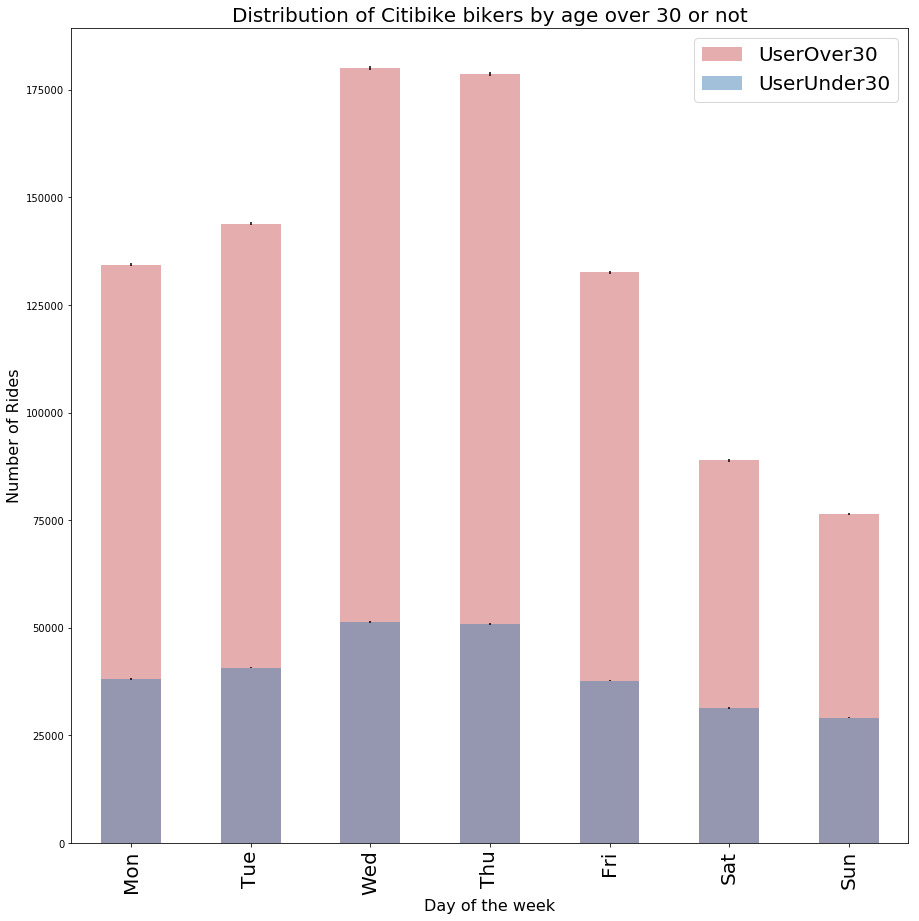

In [42]:
#Unnormalized with error info plot
norm_over30 = 1
norm_under30 = 1
PlotTheDistribution(counts_over30, counts_under30, norm_over30, norm_under30, error_over30, error_under30,'Number of Rides')

# Figure 1a: Distribution of Citibike bikers by age over 30 or not in June 2016, absolute counts with error info

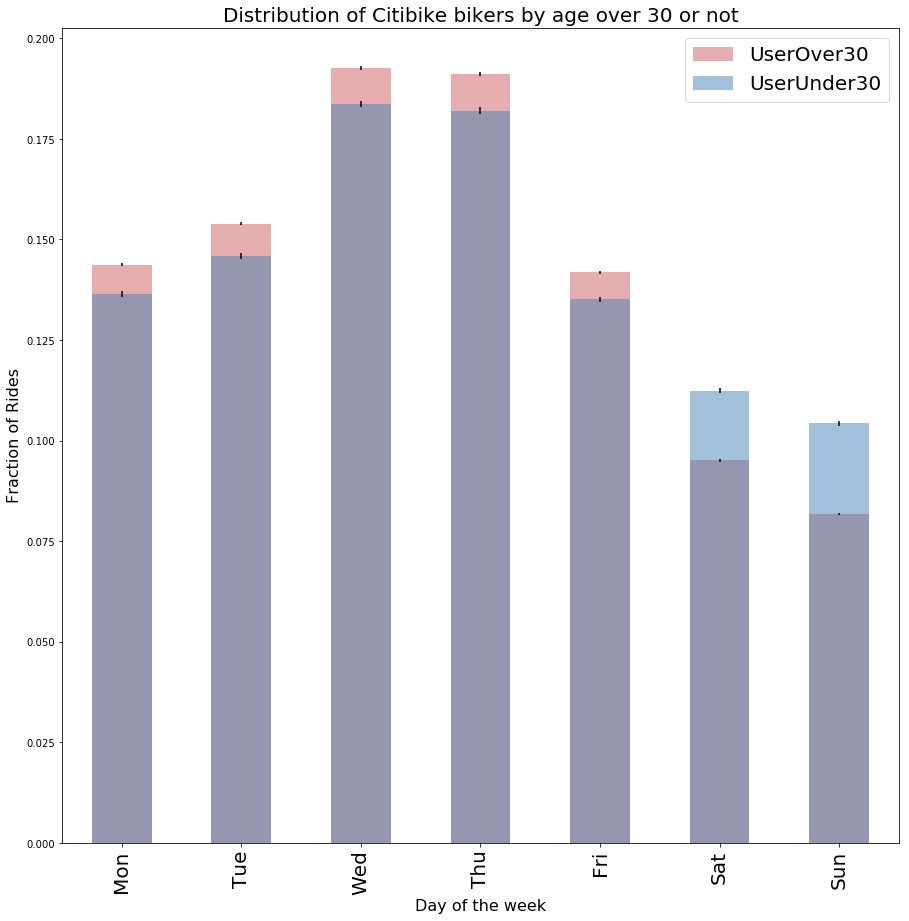

In [43]:
#Normalized with error info plot
norm_over30 = counts_over30.sum()
norm_under30 = counts_under30.sum() 
PlotTheDistribution(counts_over30, counts_under30, norm_over30, norm_under30, error_over30, error_under30, 'Fraction of Rides')

In [66]:
#Function of user over certain  that bikes during the weekdays
def PlotTheFraction(fraction1, fraction2, error1, error2, timeline):
    fig = plt.figure(figsize(8,8))
    plt.errorbar([0.4], [fraction1], yerr=[error1], fmt='o', label='UserOver30')
    plt.errorbar([0.2], [fraction2], yerr=[error2], fmt='o', label='UserUnder30')
    plt.title(timeline, fontsize=20)
    plt.xlim(0, 0.5)
    plt.xticks([])
    plt.ylabel("Fraction of normalized rides by Age",fontsize=16)
    plt.legend(fontsize=20)
    plt.show()

In [67]:
#Fraction of user over 30 that bikes during the weekdays 
#and the fraction that bikes during weekends, and the same for the use under30
week_over30 = sum(counts_over30[:-2]) * 1.0 / norm_over30
weekend_over30 = sum(counts_over30[-2:])*1.0 / norm_over30
week_over30_error = np.sqrt(sum(error_over30[:-2]**2)) / norm_over30
weekend_over30_error = np.sqrt(sum(error_over30[-2:]**2)) / norm_over30
week_under30 = sum(counts_under30[:-2]) * 1.0 / norm_under30
weekend_under30 = sum(counts_under30[-2:])*1.0 / norm_under30
week_under30_error = np.sqrt(sum(error_under30[:-2]**2)) / norm_under30
weekend_under30_error = np.sqrt(sum(error_under30[-2:]**2)) / norm_under30
print("UserOver30: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_over30, weekend_over30, week_over30_error, weekend_over30_error))
print("UserUnder30: week:{0:.4f}, weekend:{1:.4f}, weekend error:{2:.4f}, weekend error:{3:.4f}"\
      .format(week_under30, weekend_under30, week_under30_error, weekend_under30_error))

UserOver30: week:0.8231, weekend:0.1769, weekend error:0.0009, weekend error:0.0004
UserUnder30: week:0.7833, weekend:0.2167, weekend error:0.0017, weekend error:0.0009


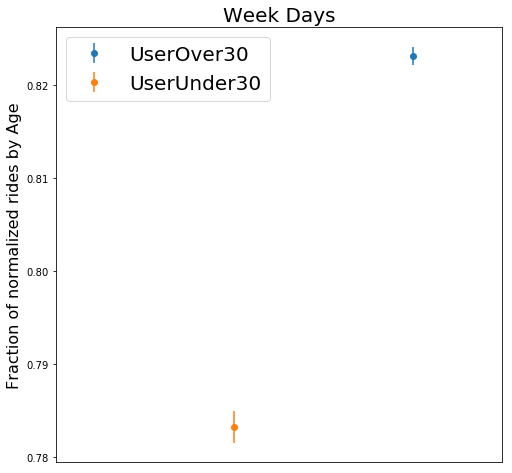

In [68]:
#Plot the fraction of Users on week days
PlotTheFraction(week_over30, week_under30, week_over30_error, week_under30_error, 'Week Days')

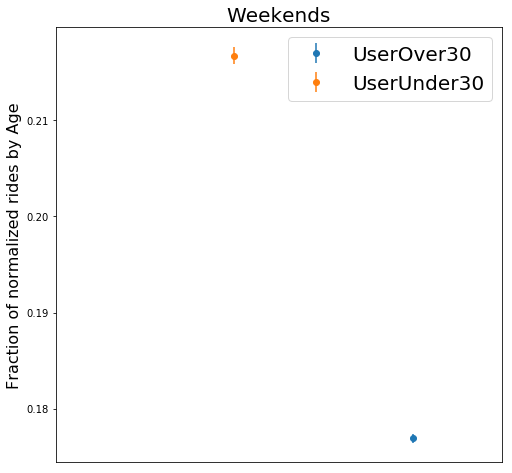

In [69]:
#Plot the fraction of Users on weekends
PlotTheFraction(weekend_over30, weekend_under30, weekend_over30_error, weekend_under30_error, 'Weekends')

In [78]:
P0mP1 = weekend_under30 - weekend_over30
print ("difference between user over 30 and user under 30 on weekends: ", P0mP1)
if P0mP1 <= 0:
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

difference between user over 30 and user under 30 on weekends:  0.03984898659887168
We must check the significance before we reject the Null Hypothesis


In [79]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_under30, weekend_over30, norm_under30, norm_over30), norm_under30, norm_over30)
# print (sp_stdev_mw)
z = zscore(weekend_under30, weekend_over30, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is 47.48


# z-score equals as 47.48, far more than largest number in z stats as 3, thus p << smaller than my chosen 0.05, it means we can reject the null hypothesis